In [3]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

data = pd.read_csv(r"C:\Users\P R O B O O K\Downloads\data_jobs.csv")
df = data.copy()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [6]:
df_exploded = df.explode('job_skills')

In [12]:
skill_count = df_exploded.groupby(['job_title_short','job_skills']).size()

In [15]:
df_skill_count = skill_count.reset_index(name = 'skill_count')
df_skill_count=df_skill_count.sort_values(by='skill_count', ascending=False)
df_skill_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


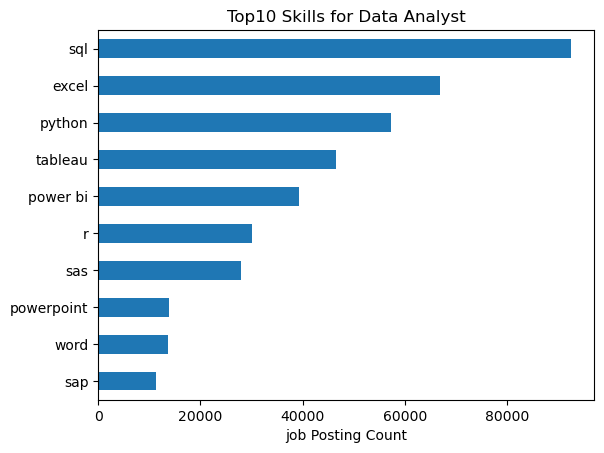

In [24]:
job_title = 'Data Analyst'
top_skill = 10

df_skill_final = df_skill_count[df_skill_count['job_title_short'] == job_title].head(top_skill)
df_skill_final.plot(kind='barh',x= 'job_skills', y= 'skill_count')
plt.gca().invert_yaxis()
plt.title(f'Top{top_skill} Skills for {job_title}')
plt.xlabel('job Posting Count')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()

<Axes: xlabel='job_skills'>

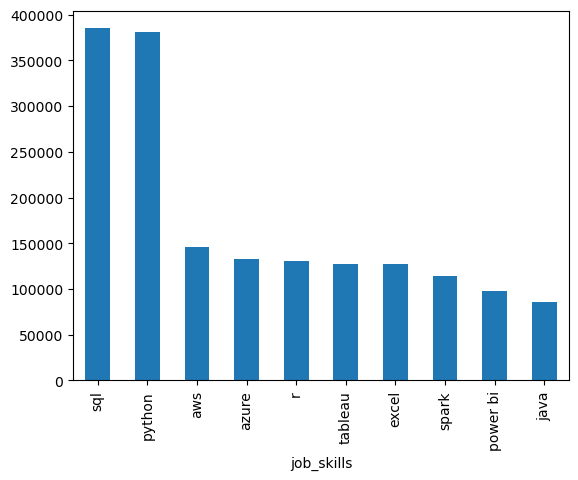

In [7]:
df_exploded['job_skills'].value_counts().head(10).plot(kind= 'bar')